In [23]:
cats1=open("./databases/DB_Info/eggNOG/eggnog4.functional_categories.txt").readlines()

out2=open("./databases/DB_Info/eggNOG/egg_func_cats.txt","w")
out2.write("larger_cat\tegg_category\tfunction\n")

for l in cats1:
    if l.startswith(" ["):
        code= l.split(" ")[1].replace("[","").replace("]","")
        func= l.split("] ")[1].replace(" \n","")
        out2.write(larger_cat+"\t"+code+"\t"+func+"\n")
    else:
        larger_cat=l.replace("\n","")
out2.close()

In [78]:
import re
out=open("./databases/DB_Info/kegg/ko_info.txt","w")
out.write("group\tcategory\tgroup_ko\tcat_KO\tdesc\tec\n")


with open("./databases/DB_Info/kegg/ko00001.keg") as infile:
    for line in infile:
        if line.startswith("A"):
            col1=line.split("<b>")[1].replace("</b>","").replace("\n","")
        elif line.startswith("C"):
            category=re.search(r"(?<=[0-9]{5}).*(?=\[(.*?)\])", line).group(0)
            ko=re.search(r"\[(.*?)\]", line).group(0)
        elif line.startswith("D"):
            K=re.search(r"K[0-9]{5}", line).group(0)
            try:
                a=re.search(r"(?<=K[0-9]{5}).*(?=\[(.*?)\])", line).group(0).replace("\n","")
                ec=re.search(r"\[(.*?)\]", line).group(0)
            except:
                a=re.search(r"(?<=K[0-9]{5}).*", line).group(0).replace("\n","")
                ec="none"
            out.write(col1+"\t"+category+"\t"+ko+"\t"+K+"\t"+a+"\t"+ec+"\n")
        else:
            continue
out.close()

In [35]:
%load_ext rpy2.ipython
%R library(dplyr); library(ggplot2); library(reshape); library(magrittr)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


array(['magrittr', 'reshape', 'ggplot2', 'dplyr', 'tools', 'stats',
       'graphics', 'grDevices', 'utils', 'datasets', 'methods', 'base'], 
      dtype='|S9')

In [40]:
%%R 
a<-read.csv("./nvp_kep_fix.txt",na.strings="NA", sep="\t", header=FALSE)
colnames(a)[2]<-"locus_tag"


pvh_blast<-read.csv("pvh_blast_summary.txt",header=TRUE, sep="\t")
pvh_blast%>%group_by(locus_tag)%>%summarise(host_hit_count=n())->hhits

merge(a, hhits, by="locus_tag", all.x=TRUE)->a1
head(a1)%>%print


pogs<-a1[,c(1:2,17:25,26)]

kegg<-a1[,c(1:9,26)]
eggnog<-a1[,c(1:2,10:16,26)]

    locus_tag                                 V1   V3 V4 V5   V6   V7   V8   V9
1 NVP1003O_01 Vibriophage_1.003.O._10N.286.48.A2 <NA> NA NA <NA> <NA> <NA> <NA>
2 NVP1003O_02 Vibriophage_1.003.O._10N.286.48.A2 <NA> NA NA <NA> <NA> <NA> <NA>
3 NVP1003O_03 Vibriophage_1.003.O._10N.286.48.A2 <NA> NA NA <NA> <NA> <NA> <NA>
4 NVP1003O_04 Vibriophage_1.003.O._10N.286.48.A2 <NA> NA NA <NA> <NA> <NA> <NA>
5 NVP1003O_05 Vibriophage_1.003.O._10N.286.48.A2 <NA> NA NA <NA> <NA> <NA> <NA>
6 NVP1003O_06 Vibriophage_1.003.O._10N.286.48.A2 <NA> NA NA <NA> <NA> <NA> <NA>
   V10 V11 V12 V13  V14  V15  V16  V17 V18 V19 V20  V21  V22  V23  V24  V25
1 <NA>  NA  NA  NA <NA> <NA> <NA> <NA>  NA  NA  NA <NA> <NA> <NA> <NA> <NA>
2 <NA>  NA  NA  NA <NA> <NA> <NA> <NA>  NA  NA  NA <NA> <NA> <NA> <NA> <NA>
3 <NA>  NA  NA  NA <NA> <NA> <NA> <NA>  NA  NA  NA <NA> <NA> <NA> <NA> <NA>
4 <NA>  NA  NA  NA <NA> <NA> <NA> <NA>  NA  NA  NA <NA> <NA> <NA> <NA> <NA>
5 <NA>  NA  NA  NA <NA> <NA> <NA> <NA>  NA  NA  NA <NA> <NA>

[1] 2655
[1] 575


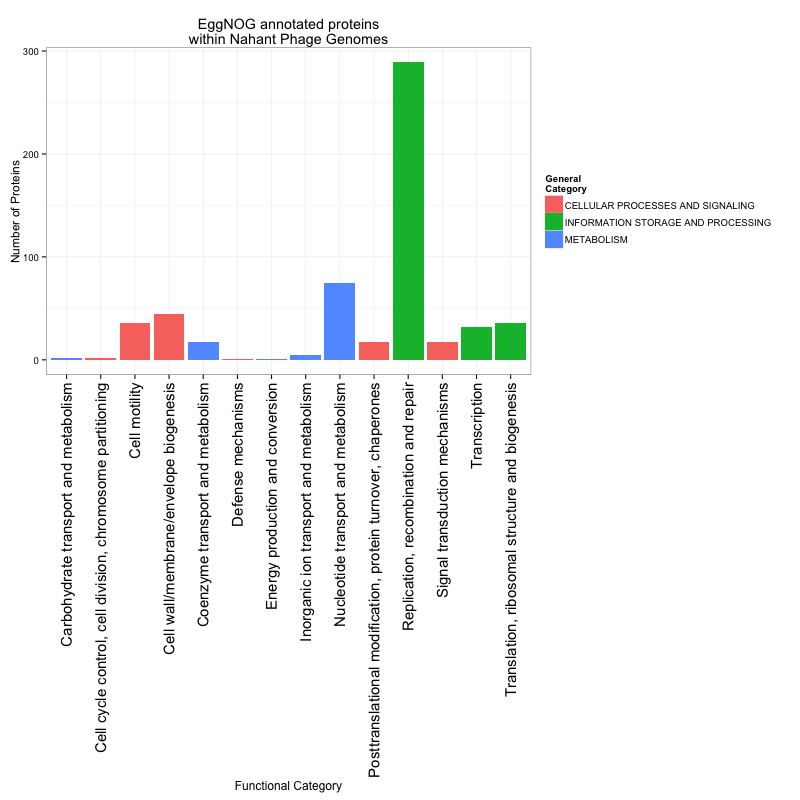

In [140]:
%%R -w 800 -h 800
eggnog1<-na.omit(eggnog[,1:ncol(eggnog)-1])
eggnog1%>%group_by(V14)%>%summarise(count=n())->pop_egg_sum
colnames(pop_egg_sum)<-c("egg_category","num_proteins")

categories<-read.table("./databases/DB_Info/eggNOG/egg_func_cats.txt", sep="\t", header=TRUE)

pop_egg_sum<-merge(pop_egg_sum, categories, by="egg_category", all.x=TRUE, all.y=TRUE)

pop_egg_sum%>%na.omit%>%filter(function.!="Function unknown")%>%ggplot(aes(function., num_proteins, fill=larger_cat))+geom_bar(stat="identity")+theme_bw()->p
p+theme(axis.text.x  = element_text(angle=90,vjust=0.5, hjust=1, size=15))+labs(title="EggNOG annotated proteins\nwithin Nahant Phage Genomes", y="Number of Proteins", x="Functional Category", fill="General\nCategory")->p
plot(p)
print(pop_egg_sum$num_proteins%>%na.omit%>%sum)
pop_egg_sum%>%na.omit%>%filter(function.!="Function unknown")%>%.$num_proteins%>%sum%>%print

[1] 465
[1] 137


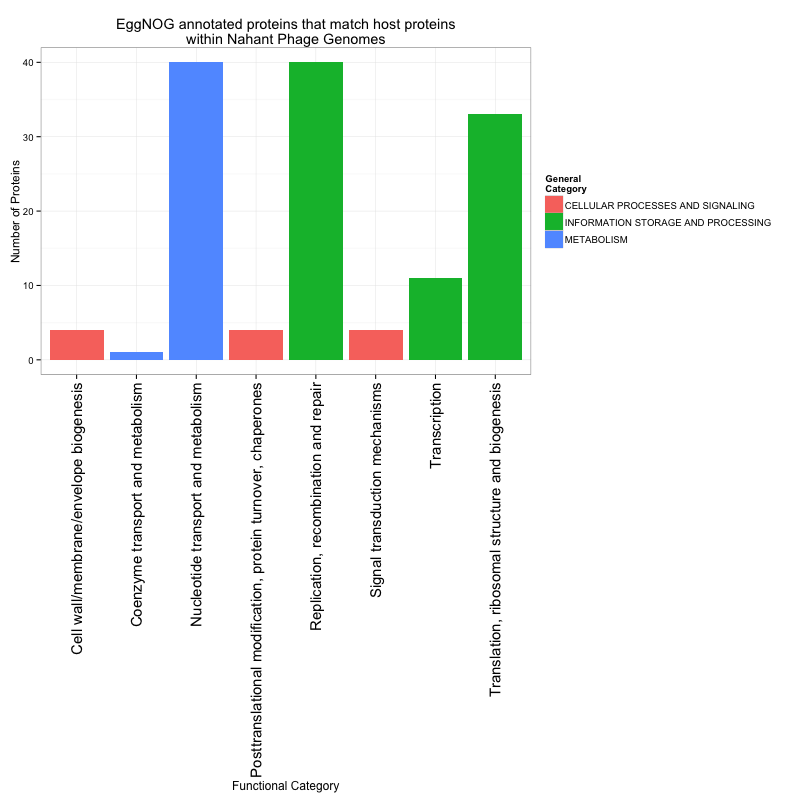

In [141]:
%%R -w 800 -h 800
eggnog1<-na.omit(eggnog)
eggnog1%>%group_by(V14)%>%summarise(count=n())->pop_egg_sum
colnames(pop_egg_sum)<-c("egg_category","num_proteins")

categories<-read.table("./databases/DB_Info/eggNOG/egg_func_cats.txt", sep="\t", header=TRUE)

pop_egg_sum<-merge(pop_egg_sum, categories, by="egg_category", all.x=TRUE, all.y=TRUE)

pop_egg_sum%>%na.omit%>%filter(function.!="Function unknown")%>%ggplot(aes(function., num_proteins, fill=larger_cat))+geom_bar(stat="identity")+theme_bw()->p
p+theme(axis.text.x  = element_text(angle=90,vjust=0.5, hjust=1, size=15))+labs(title="EggNOG annotated proteins that match host proteins\nwithin Nahant Phage Genomes", y="Number of Proteins", x="Functional Category", fill="General\nCategory")->p
plot(p)
print(pop_egg_sum$num_proteins%>%na.omit%>%sum)
pop_egg_sum%>%na.omit%>%filter(function.!="Function unknown")%>%.$num_proteins%>%sum%>%print

[1] 221


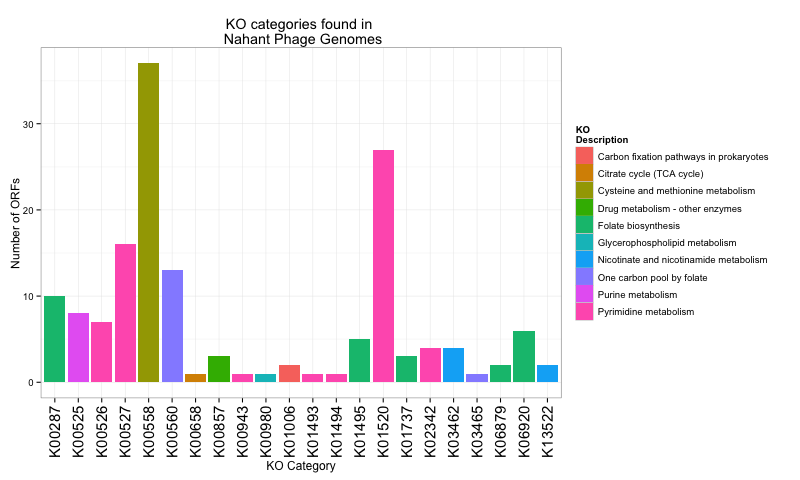

In [147]:
%%R -w 800
kegg1<-na.omit(kegg[,1:ncol(kegg)-1])
kinfo<-read.csv("./databases/DB_Info/kegg/ko_info.txt", header=TRUE, sep="\t")

colnames(kegg1)<-c("phage","orf","kegg_seq","pct_id","bit_score","eval","pathway","cat_KO","def")

kegg1%>%group_by(cat_KO)%>%summarise(count=n())%>%merge(.,kinfo, by="cat_KO", all.X=TRUE)->KO_sum
KO_sum[!duplicated(KO_sum$cat_KO),]%>%na.omit%>%ggplot(aes(cat_KO, count, fill=category))+geom_bar(stat="identity")+theme_bw()->p
p+theme(axis.text.x  = element_text(angle=90,vjust=0.5, hjust=1, size=15))+labs(title="KO categories found in \n Nahant Phage Genomes", x="KO Category", y="Number of ORFs", fill="KO\nDescription")->p

print(sum(KO_sum$count))
plot(p)

[1] 60


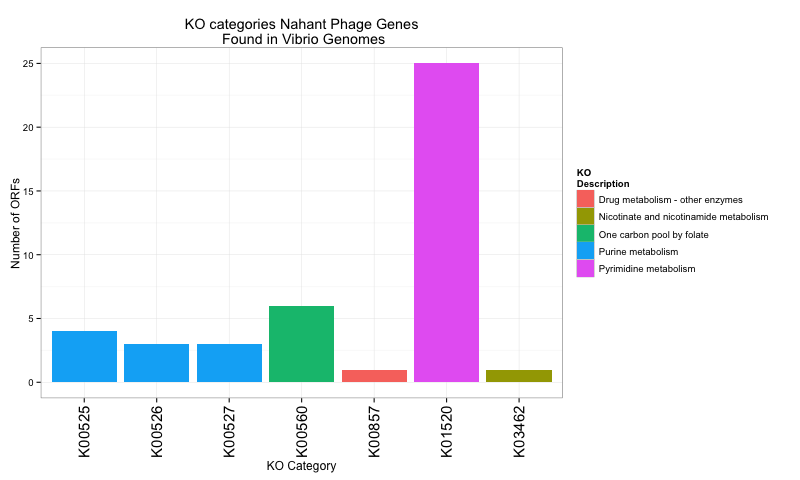

In [148]:
%%R -w 800
kegg1<-na.omit(kegg)
kinfo<-read.csv("./databases/DB_Info/kegg/ko_info.txt", header=TRUE, sep="\t")

colnames(kegg1)<-c("phage","orf","kegg_seq","pct_id","bit_score","eval","pathway","cat_KO","def")

kegg1%>%group_by(cat_KO)%>%summarise(count=n())%>%merge(.,kinfo, by="cat_KO", all.X=TRUE)->KO_sum
KO_sum[!duplicated(KO_sum$cat_KO),]%>%na.omit%>%ggplot(aes(cat_KO, count, fill=category))+geom_bar(stat="identity")+theme_bw()->p
p+theme(axis.text.x  = element_text(angle=90,vjust=0.5, hjust=1, size=15))+labs(title="KO categories Nahant Phage Genes\n Found in Vibrio Genomes", x="KO Category", y="Number of ORFs", fill="KO\nDescription")->p

print(sum(KO_sum$count))
plot(p)

### looking at the overall annotations now:

In [61]:
%%R
all<-read.csv("./all_annotations.20151109.txt", sep="\t", na.string="NA",header=FALSE)
all$V15<-NULL
colnames(all)<-c("phage","locus_tag","type","start","stop","strand","annotation","kegg","pfam","cog","eggnog","aclame","OM-RGC","cvp")
paste(nrow(all),"proteins total", sep=" ")

[1] "22045 proteins total"


[1] "1692 proteins with non-hypothetical annotations"


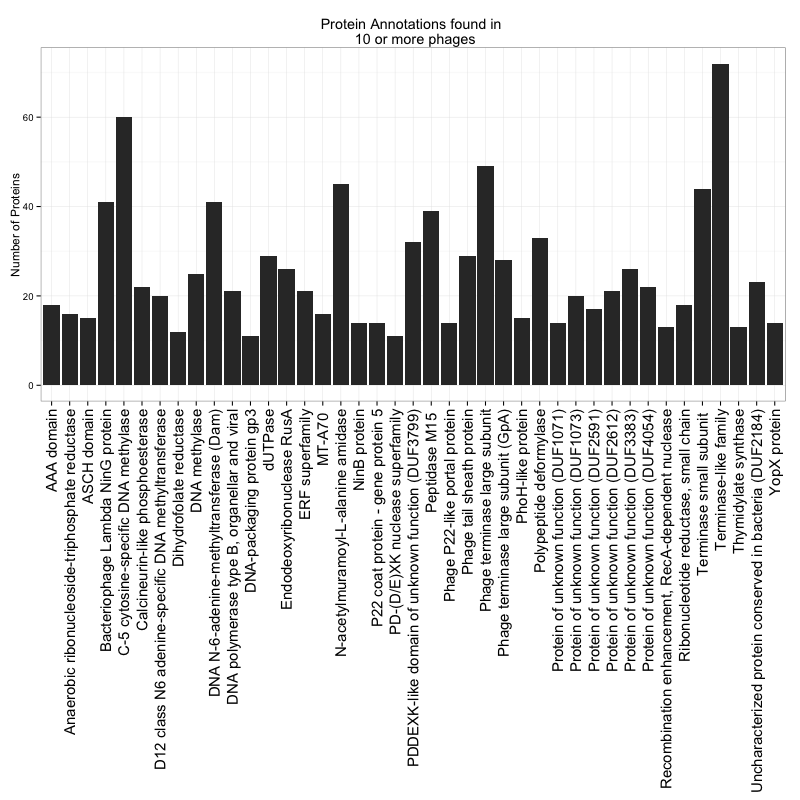

In [59]:
%%R -w 800 -h 800
all%>%group_by(annotation)%>%summarise(counts=n())->annotations
annotations[order(-annotations$counts),]
annotations%>%filter(annotation!="hypothetical protein", counts>10)%>%ggplot(aes(annotation, counts))+geom_bar(stat="identity")->p
p+theme_bw()+theme(axis.text.x  = element_text(angle=90,vjust=0.5, hjust=1, size=15))->p
plot(p+labs(title="Protein Annotations found in \n 10 or more phages", y="Number of Proteins", x=NULL))
annotations%>%filter(annotation!="hypothetical protein")->non_hyp
sum(non_hyp$counts)%>%paste(.,"proteins with non-hypothetical annotations", sep=" ")

In [ ]:
'''
phage structural protein keywords:
capsid
portal
sheath
tail
head
coat
'''
structural="capsid|portal|sheath|tail|head|coat"

'''
packaging protein keywords:
terminase
'''
packaging="terminase"

'''
replication protein keywords:
polymerase
helicase

'''
replication="polymerase|helicase"

'''
lysogeny related proteins:
integrase
exonuclease
'''
lysogeny="integrase|exonuclease"

'''
host counter defense:

methylase
methyltransferase
restriction

Rex
protease
antitoxin
plasmid-associated

cas
crispr
'''
defense="methylase|methyltransferase|restriction|rex|Rex|antitoxin|plasmid|cas|crispr"

In [101]:
%%R
structural="capsid|portal|sheath|tail|head|coat|virion|tube"
packaging="terminase"
replication="polymerase|helicase|replication|pol"
lysogeny="integrase|exonuclease|transposase"
defense="methylase|methyltransferase|restriction|rex|Rex|antitoxin|plasmid|cas|crispr"

all[grepl(structural, all$annotation, ignore.case=TRUE),]%>%group_by(phage)%>%summarise%>%nrow%>%paste("phages have structural proteins")%>%print
all[grepl(packaging, all$annotation, ignore.case=TRUE),]%>%group_by(phage)%>%summarise%>%nrow%>%paste("phages have terminases proteins")%>%print
all[grepl(replication, all$annotation, ignore.case=TRUE),]%>%group_by(phage)%>%summarise%>%nrow%>%paste("phages have replication proteins")%>%print
all[grepl(lysogeny, all$annotation, ignore.case=TRUE),]%>%group_by(phage)%>%summarise%>%nrow%>%paste("phages have exonuclease proteins")%>%print
all[grepl(defense, all$annotation, ignore.case=TRUE),]%>%group_by(phage)%>%summarise%>%nrow%>%paste("phages have host defensive proteins")%>%print

[1] "69 phages have structural proteins"
[1] "158 phages have terminases proteins"
[1] "61 phages have replication proteins"
[1] "12 phages have exonuclease proteins"
[1] "124 phages have host defensive proteins"


[1] 270


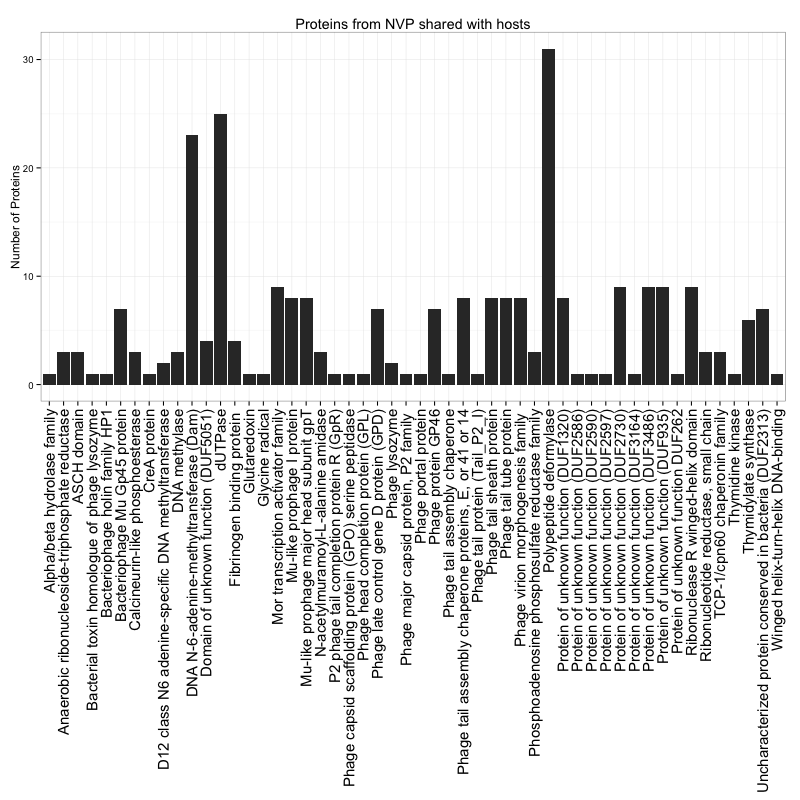

In [51]:
%%R -h 800 -w 800

all1<-merge(all, hhits, by="locus_tag")
head(all1)
all1%>%group_by(annotation)%>%summarise(counts=n())->annotations
annotations[order(-annotations$counts),]
annotations%>%filter(annotation!="hypothetical protein")%>%ggplot(aes(annotation, counts))+geom_bar(stat="identity")->p
p+theme_bw()+theme(axis.text.x  = element_text(angle=90,vjust=0.5, hjust=1, size=15))->p
plot(p+labs(title="Proteins from NVP shared with hosts", y="Number of Proteins", x=NULL))
annotations%>%filter(annotation!="hypothetical protein")->non_hyp
sum(non_hyp$counts)

In [62]:
%%R
all1%>%group_by(phage)%>%summarise(count=n())%>%nrow%>%paste(.,"phage genomes with proteins similar to proteins found in the Vibrio population", sep=" ")
all1%>%group_by(phage)%>%summarise(count=n())->hpp
hpp$yes<-1
head(hpp)

Source: local data frame [6 x 3]

                                phage count   yes
                               (fctr) (int) (dbl)
1  Vibriophage_1.003.O._10N.286.48.A2     1     1
2  Vibriophage_1.005.O._10N.286.48.F2     5     1
3  Vibriophage_1.007.O._10N.261.55.F9     2     1
4  Vibriophage_1.009.O._10N.261.51.C9     2     1
5 Vibriophage_1.017.O._10N.286.55.C11     1     1
6  Vibriophage_1.020.O._10N.222.48.A2     1     1


In [111]:
groups=open("/Users/jmb/Desktop/ViralFate/OrthoMCL/phage_v_phage/groups.txt")

out=open("nvp_lts_by_clust.txt","w")
out.write("locus_tag\tcluster\n")

with open("/Users/jmb/Desktop/ViralFate/OrthoMCL/phage_v_phage/groups.txt") as infile:
    for l in infile:
        clust=l.split(":")[0]
        prots=l.split(":")[1].split(" ")[1:]
        lts=[i.split("|")[1].replace("\n","") for i in prots]
        for l in lts:
            if l==" ":
                continue
            else:
                out.write(l+"\t"+clust+"\n")
out.close()

In [217]:
%%R
clusts<-read.table("nvp_lts_by_clust.txt", header=TRUE, sep="\t")
all<-read.csv("./all_annotations.20151109.txt", sep="\t", na.string="NA",header=FALSE)
all$V15<-NULL
colnames(all)<-c("phage","locus_tag","type","start","stop","strand","annotation","kegg","pfam","cog","eggnog","aclame","OM-RGC","cvp")
all2=merge(clusts, all, by="locus_tag", all.y=TRUE)
head(all2)
all2$cluster[is.na(all2$cluster)]<-"none"


all2%>%filter(all2$cluster!="none")%>%group_by(cluster, annotation)%>%summarise(annote_count=n())->potential.clust.annotations
potential.clust.annotations%>%filter(annotation!="hypothetical protein")->nh
nh%>%filter(annotation=="'Cold-shock' DNA-binding domain")

Source: local data frame [1 x 3]
Groups: cluster [1]

  cluster                      annotation annote_count
   (fctr)                          (fctr)        (int)
1 pvp1806 'Cold-shock' DNA-binding domain            1


In [218]:
%%R
all2$new_annotation<-nh$annotation[match(all2$cluster, nh$cluster)]
all2$new_annotation[is.na(all2$new_annotation)]<-"hypothetical protein"
#all2%>%filter(new_annotation!="<NA>", annotation=="hypothetical protein")%>%nrow%>%print
#all2$annotation <- with( all2, ifelse( annotation == "hypothetical protein" & new_annotation!="<NA>", new_annotation, annotation )) 
head(all2)

    locus_tag cluster                              phage type start  stop
1 NVP1003O_10 pvp1325 Vibriophage_1.003.O._10N.286.48.A2  cds  9932 10603
2 NVP1003O_11 pvp1393 Vibriophage_1.003.O._10N.286.48.A2  cds 10581 11048
3 NVP1003O_12 pvp1338 Vibriophage_1.003.O._10N.286.48.A2  cds 11045 11674
4 NVP1003O_13 pvp1414 Vibriophage_1.003.O._10N.286.48.A2  cds 11674 12780
5 NVP1003O_14 pvp1453 Vibriophage_1.003.O._10N.286.48.A2  cds 12777 14714
6 NVP1003O_15 pvp2120 Vibriophage_1.003.O._10N.286.48.A2  cds 14725 14970
  strand           annotation kegg pfam  cog      eggnog             aclame
1      + hypothetical protein <NA> <NA> <NA>        <NA>               <NA>
2      + hypothetical protein <NA> <NA> <NA>        <NA>               <NA>
3      + hypothetical protein <NA> <NA> <NA> ENOG410Z2M5 protein:vir:105426
4      + hypothetical protein <NA> <NA> <NA>        <NA>               <NA>
5      + hypothetical protein <NA> <NA> <NA>        none   protein:vir:9273
6      - hypothetical prot

In [220]:
%%R
library(data.table)
#all2<-data.table(all2)
#all2[ annotation == "hypothetical protein", annotation := new_annotation ]
all2[ all2$annotation == "hypothetical protein" , "annotation" ] <- all2[ all2$annotation == "hypothetical protein", "new_annotation" ]
all2%>%filter(annotation!="hypothetical protein")%>%nrow%>%print
head(all2)

[1] 2317
    locus_tag cluster                              phage type start  stop
1 NVP1003O_10 pvp1325 Vibriophage_1.003.O._10N.286.48.A2  cds  9932 10603
2 NVP1003O_11 pvp1393 Vibriophage_1.003.O._10N.286.48.A2  cds 10581 11048
3 NVP1003O_12 pvp1338 Vibriophage_1.003.O._10N.286.48.A2  cds 11045 11674
4 NVP1003O_13 pvp1414 Vibriophage_1.003.O._10N.286.48.A2  cds 11674 12780
5 NVP1003O_14 pvp1453 Vibriophage_1.003.O._10N.286.48.A2  cds 12777 14714
6 NVP1003O_15 pvp2120 Vibriophage_1.003.O._10N.286.48.A2  cds 14725 14970
  strand           annotation kegg pfam  cog      eggnog             aclame
1      + hypothetical protein <NA> <NA> <NA>        <NA>               <NA>
2      + hypothetical protein <NA> <NA> <NA>        <NA>               <NA>
3      + hypothetical protein <NA> <NA> <NA> ENOG410Z2M5 protein:vir:105426
4      + hypothetical protein <NA> <NA> <NA>        <NA>               <NA>
5      + hypothetical protein <NA> <NA> <NA>        none   protein:vir:9273
6      - hypothet

In [216]:
%%R
all2[grepl(structural, all2$annotation, ignore.case=TRUE),]%>%group_by(phage)%>%summarise%>%nrow%>%paste("phages have structural proteins")%>%print
all2[grepl(packaging, all2$annotation, ignore.case=TRUE),]%>%group_by(phage)%>%summarise%>%nrow%>%paste("phages have terminases proteins")%>%print
all2[grepl(replication, all2$annotation, ignore.case=TRUE),]%>%group_by(phage)%>%summarise%>%nrow%>%paste("phages have replication proteins")%>%print
all2[grepl(lysogeny, all2$annotation, ignore.case=TRUE),]%>%group_by(phage)%>%summarise%>%nrow%>%paste("phages have exonuclease proteins")%>%print
all2[grepl(defense, all2$annotation, ignore.case=TRUE),]%>%group_by(phage)%>%summarise%>%nrow%>%paste("phages have host defensive proteins")%>%print

all2%>%filter(annotation!="hypothetical protein")%>%nrow%>%print

[1] "69 phages have structural proteins"
[1] "159 phages have terminases proteins"
[1] "65 phages have replication proteins"
[1] "13 phages have exonuclease proteins"
[1] "129 phages have host defensive proteins"
[1] 2317


In [197]:
##compared to before this manipulation:
'''
"69 phages have structural proteins"
[1] "158 phages have terminases proteins"
[1] "61 phages have replication proteins"
[1] "12 phages have exonuclease proteins"
[1] "124 phages have host defensive proteins"
'''
#did not improve expected phage annotations, but increased the number of non-hypotheticals 8-fold

'\n"69 phages have structural proteins"\n[1] "158 phages have terminases proteins"\n[1] "61 phages have replication proteins"\n[1] "12 phages have exonuclease proteins"\n[1] "124 phages have host defensive proteins"\n'

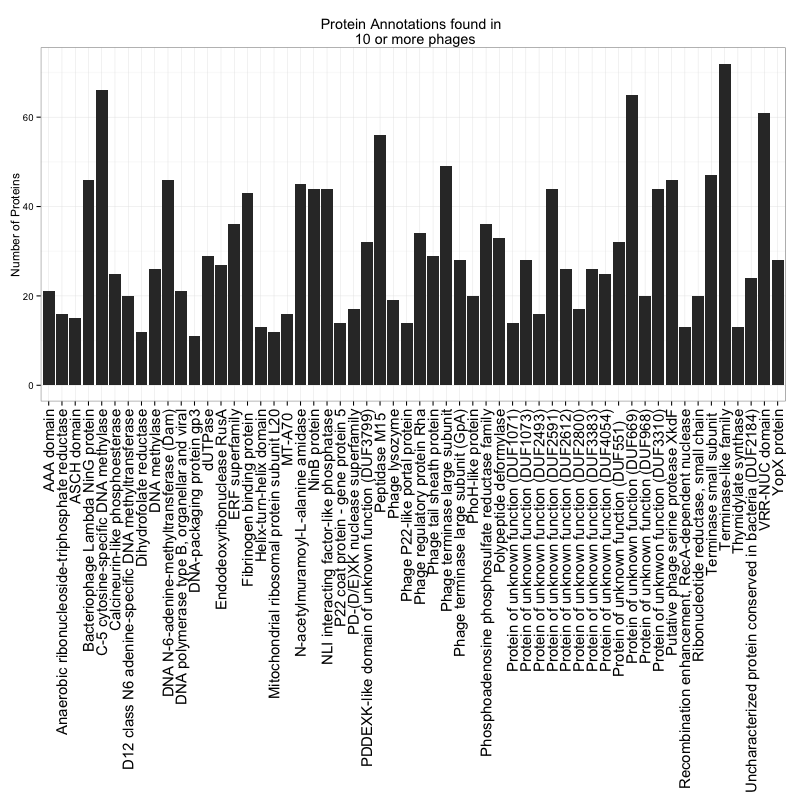

In [213]:
%%R -h 800 -w 800
all2%>%group_by(annotation)%>%summarise(counts=n())->annotations
annotations[order(-annotations$counts),]
annotations%>%filter(annotation!="hypothetical protein", counts>10)%>%ggplot(aes(annotation, counts))+geom_bar(stat="identity")->p
p+theme_bw()+theme(axis.text.x  = element_text(angle=90,vjust=0.5, hjust=1, size=15))->p
plot(p+labs(title="Protein Annotations found in \n 10 or more phages", y="Number of Proteins", x=NULL))

Improved annotations a little... number of annotated proteins doubled, so that's cool.  I wonder if it's worth it for the sketchy approach...